In [15]:
%pylab
%matplotlib inline
%load_ext autoreload
%autoreload 2

import skimage.io as sk
from Functions import image_processing as ip
from Functions import region_merging as rm
from Functions import seeded_region_growing as srg
from Functions import seed_detection as sd
from PIL import Image

Using matplotlib backend: Qt5Agg
Populating the interactive namespace from numpy and matplotlib


C:\Users\L\PycharmProjects\2021-topic-04-team-04\Functions\seed_detection.py:51: RuntimeWarning: overflow encountered in ubyte_scalars
  neighborhood_distance.append((img[p] - img[i, j]) / img[p])  # adds relative euclidean distance to list
C:\Users\L\PycharmProjects\2021-topic-04-team-04\Functions\seed_detection.py:51: RuntimeWarning: invalid value encountered in ubyte_scalars
  neighborhood_distance.append((img[p] - img[i, j]) / img[p])  # adds relative euclidean distance to list
C:\Users\L\PycharmProjects\2021-topic-04-team-04\Functions\seed_detection.py:51: RuntimeWarning: divide by zero encountered in ubyte_scalars
  neighborhood_distance.append((img[p] - img[i, j]) / img[p])  # adds relative euclidean distance to list


1000
2000


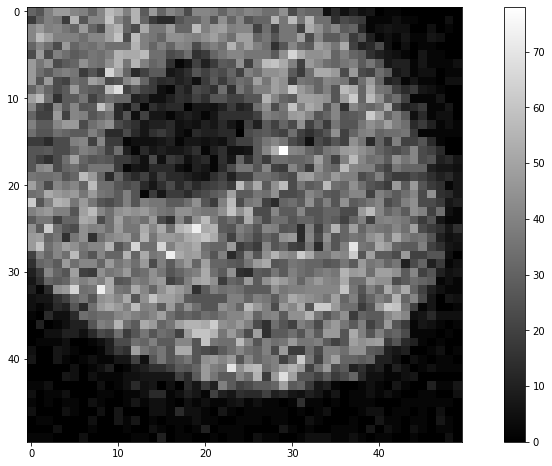

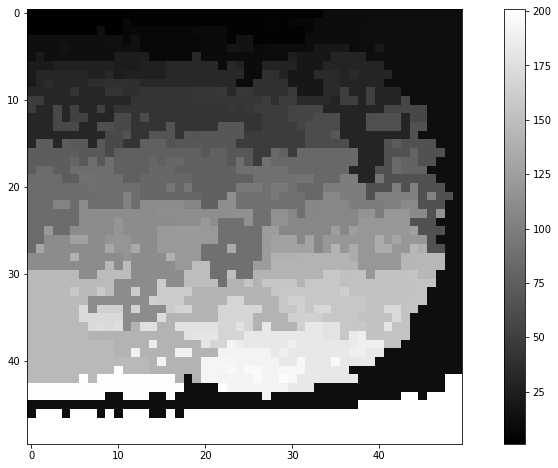

In [16]:
image_intensity = sk.imread("Data/N2DH-GOWT1/img/t01.tif")  # load image
image_intensity = image_intensity[300:350, 450:500]
ip.show_image(image_intensity, 15, 8)
image_r = sd.seeds(image_intensity, 0.1, 1)
image_r = sd.seed_merging(image_r)
image_r = srg.region_growing(image_intensity, image_r)
ip.show_image(image_r,15,8)

im = Image.fromarray(image_r)
im.save("Result_Pictures/Seeded_Region_Growing/N2DH-GOWT1/srg_t01_merged2_marie.tif")

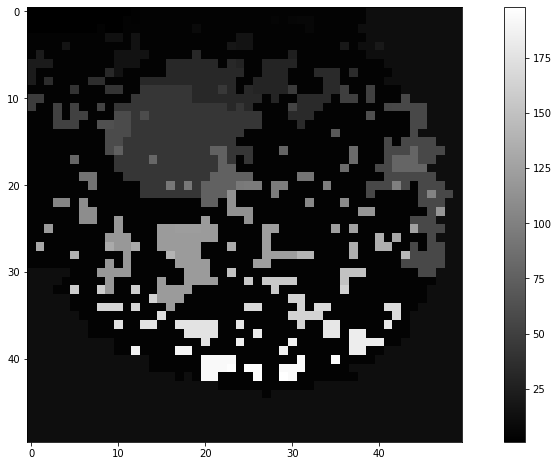

In [17]:
image_r_copy = image_r.copy()
image_r_copy = rm.distance_merging_while(image_r_copy,0.1,image_intensity)
image_result = image_r_copy[0]
ip.show_image(image_result,15,8)
#tets

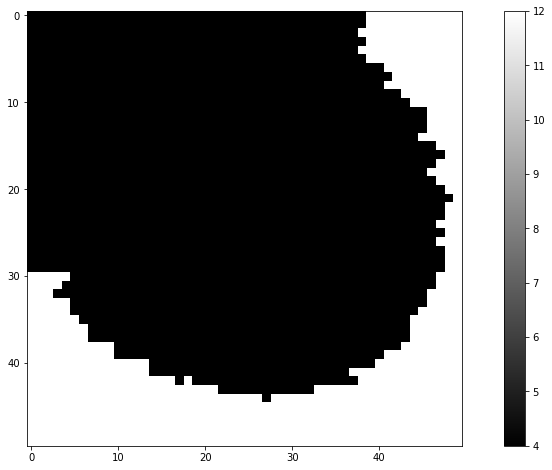

In [18]:

image_result2 = image_result.copy()
image_result2 = rm.region_merging_size(image_intensity, image_result2, image_r_copy[1], image_r_copy[2], 500)
ip.show_image(image_result2,15,8)

In [19]:

im = Image.fromarray(image_r_copy[0])
im.save("Result_Pictures/Seeded_Region_Growing/N2DH-GOWT1/srg_t01_merged2.tif")

In [20]:
im2 = Image.fromarray(image_result2)
im2.save("Result_Pictures/Seeded_Region_Growing/N2DH-GOWT1/srg_t01_merged_size.tif")

